In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
from sklearn.metrics import confusion_matrix, f1_score

In [4]:
sns.set_style('whitegrid')
sns.set_context('notebook')

In [5]:
df = pd.read_csv('./penguins.csv')

In [6]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [7]:
features = df.drop(columns=['species', 'sex', 'island'])
labels   = df['species']

In [8]:
dummies = pd.get_dummies(df['island'], prefix='Island')
for c in dummies.columns.values:
    features[c] = dummies[c]
    
features = features.fillna(features.mean())

In [9]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, stratify=labels, test_size=0.3, random_state=2023)

In [10]:
x_train

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen
287,49.5,16.2,229.0,5800.0,True,False,False
154,51.3,19.2,193.0,3650.0,False,True,False
9,42.0,20.2,190.0,4250.0,False,False,True
5,39.3,20.6,190.0,3650.0,False,False,True
85,41.3,20.3,194.0,3550.0,False,True,False
...,...,...,...,...,...,...,...
248,48.2,14.3,210.0,4600.0,True,False,False
113,42.2,19.5,197.0,4275.0,True,False,False
290,47.7,15.0,216.0,4750.0,True,False,False
89,38.9,18.8,190.0,3600.0,False,True,False


In [11]:
x_test

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,Island_Biscoe,Island_Dream,Island_Torgersen
101,41.0,20.0,203.0,4725.0,True,False,False
100,35.0,17.9,192.0,3725.0,True,False,False
263,49.6,15.0,216.0,4750.0,True,False,False
87,36.9,18.6,189.0,3500.0,False,True,False
338,47.2,13.7,214.0,4925.0,True,False,False
...,...,...,...,...,...,...,...
199,49.0,19.6,212.0,4300.0,False,True,False
58,36.5,16.6,181.0,2850.0,True,False,False
134,38.1,17.6,187.0,3425.0,False,True,False
221,50.0,16.3,230.0,5700.0,True,False,False


In [12]:
rf = RandomForestClassifier(n_estimators=20)

In [13]:
rf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=20)

In [14]:
y_pred = rf.predict(x_test)

In [15]:
confusion_matrix(y_test, y_pred)

array([[46,  0,  0],
       [ 0, 21,  0],
       [ 0,  0, 37]])

In [16]:
f1_score(y_test, y_pred, average=None)

array([1., 1., 1.])

In [17]:
fimp = pd.DataFrame(dict(fimp=rf.feature_importances_, index=features.columns))

In [18]:
cdict = {}
for i, c in enumerate(features.columns):
    cdict[c] = 'C'+str(i)
    if 'island' in c.lower():
        cdict[c] = 'C7'

In [19]:
cdict

{'bill_length_mm': 'C0',
 'bill_depth_mm': 'C1',
 'flipper_length_mm': 'C2',
 'body_mass_g': 'C3',
 'Island_Biscoe': 'C7',
 'Island_Dream': 'C7',
 'Island_Torgersen': 'C7'}

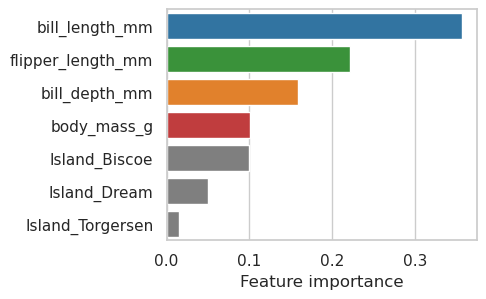

In [20]:
fig=plt.figure(figsize=(4, 3))
sns.barplot(data=fimp.sort_values('fimp', ascending=False), x='fimp', y='index', palette=cdict)
ax=plt.gca()
ax.set_xlabel('Feature importance')
ax.set_ylabel('')
plt.show()

# Leave one out

In [21]:
all_features = df.drop(columns=['species', 'sex']).columns.values
all_features

array(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g'], dtype=object)

In [22]:
all_scores = []

for i, left_out in enumerate(all_features):
    
    features = df.drop(columns=['species', 'sex', 'island'])
    labels   = df['species']
    
    print(left_out)
    
    if not left_out == 'island':
        dummies = pd.get_dummies(df['island'], prefix='Island')
        for c in dummies.columns.values:
            features[c] = dummies[c]
    
    features = features.fillna(features.mean())
        
    # split
    x_train, x_test, y_train, y_test = train_test_split(features, labels, 
                                                        stratify=labels, test_size=0.3, 
                                                        random_state=2023)
    rf = RandomForestClassifier(n_estimators=3)
    rf.fit(x_train, y_train)
    
    score = f1_score(y_test, rf.predict(x_test), average='weighted')
    confmat = confusion_matrix(y_test, rf.predict(x_test))
    print(confmat)
    print(score)
    print()
    
    all_scores.append(score)

island
[[44  1  1]
 [ 1 19  1]
 [ 1  0 36]]
0.951763602251407

bill_length_mm
[[44  0  2]
 [ 0 21  0]
 [ 0  0 37]]
0.9808085919928025

bill_depth_mm
[[43  1  2]
 [ 0 21  0]
 [ 0  0 37]]
0.9710325182567079

flipper_length_mm
[[44  2  0]
 [ 1 20  0]
 [ 0  0 37]]
0.971330771196603

body_mass_g
[[44  0  2]
 [ 0 21  0]
 [ 1  0 36]]
0.9711876584953507



In [23]:
all_scores = (1.0 - np.array(all_scores))
loo_df = pd.DataFrame(dict(loo_score=all_scores, index=all_features))

In [24]:
cdict2 = {}
for i, c in enumerate(all_features):
    if c in cdict.keys():
        cdict2[c] = cdict[c]
    if 'island' in c.lower():
        cdict2[c] = 'C7'

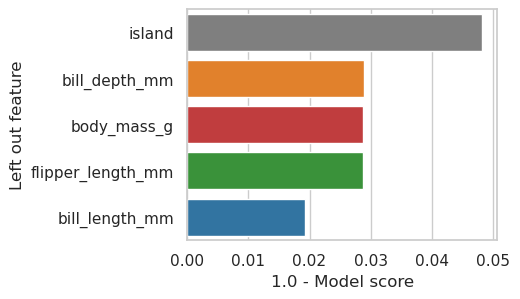

In [26]:
fig=plt.figure(figsize=(4, 3))
sns.barplot(data=loo_df.sort_values('loo_score', ascending=False), x='loo_score', y='index',
           palette=cdict2)
ax=plt.gca()
ax.set_xlabel('1.0 - Model score')
ax.set_ylabel('Left out feature')
plt.show()